In [1]:
from mnist import MNIST
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from network import *
from activations import Sigmoid
%matplotlib inline

In [2]:
mdata =MNIST('mnist')
images, labels = mdata.load_training()
imgs = np.array(images)
lbls = np.array(labels)

9

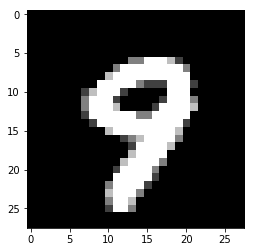

In [3]:
ind = 5999
im = np.array(images[ind], dtype=np.uint8)
im = im.reshape((28, 28))
plt.imshow(im, cmap='gray')
labels[ind]

In [10]:
layers = [784, 100, 10]
model = ClassificationNetwork(layers)

In [12]:
model.optimize(imgs, lbls, lr=0.01, batch_size=128, nb_epoch=5)

Accuracy after 1 epochs  87.0866666667 %
Accuracy after 2 epochs  87.9716666667 %
Accuracy after 3 epochs  88.5933333333 %
Accuracy after 4 epochs  89.1366666667 %
Accuracy after 5 epochs  89.4916666667 %
